In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from constants import *

In [2]:
RESULTS_FOLDER = "results"

In [3]:
model_metrics = pd.read_csv(os.path.join(RESULTS_FOLDER, "model_metrics.csv"))
model_metrics = model_metrics[["model", "valid"]]

In [4]:
model_metrics_followup = pd.read_csv(os.path.join(RESULTS_FOLDER, "model_metrics_followup.csv"))
model_metrics_followup = model_metrics_followup[["model", "valid"]]
model_metrics_followup.sort_values("valid", ascending=False)

,model,valid
0,qwen2.5coder7b,0.177871
4,deepseekcoder7b,0.141457
1,qwen2.5coder2b,0.138655
2,codellama7b,0.124650
7,magicoder7b,0.119048
6,dolphincoder7b,0.117647
9,codeqwen,0.103641
11,codegeex4,0.102241
12,yicoder9b,0.098039
3,granitecode3b,0.092437


In [5]:
model_metrics_followup["valid"].mean()

np.float64(0.10196078431372545)

In [6]:
model_metrics_followup = (
    model_metrics.set_index("model") + model_metrics_followup.set_index("model")
).reset_index()
model_metrics_followup.sort_values("valid", ascending=False)

,model,valid
0,codegeex4,0.900560
14,yicoder9b,0.899160
5,deepseekcoderv2,0.892216
11,qwen2.5coder7b,0.866947
3,codeqwen,0.830532
9,magicoder7b,0.825920
4,deepseekcoder7b,0.812885
6,dolphincoder7b,0.759797
10,qwen2.5coder2b,0.736695
1,codegemma7b,0.694678


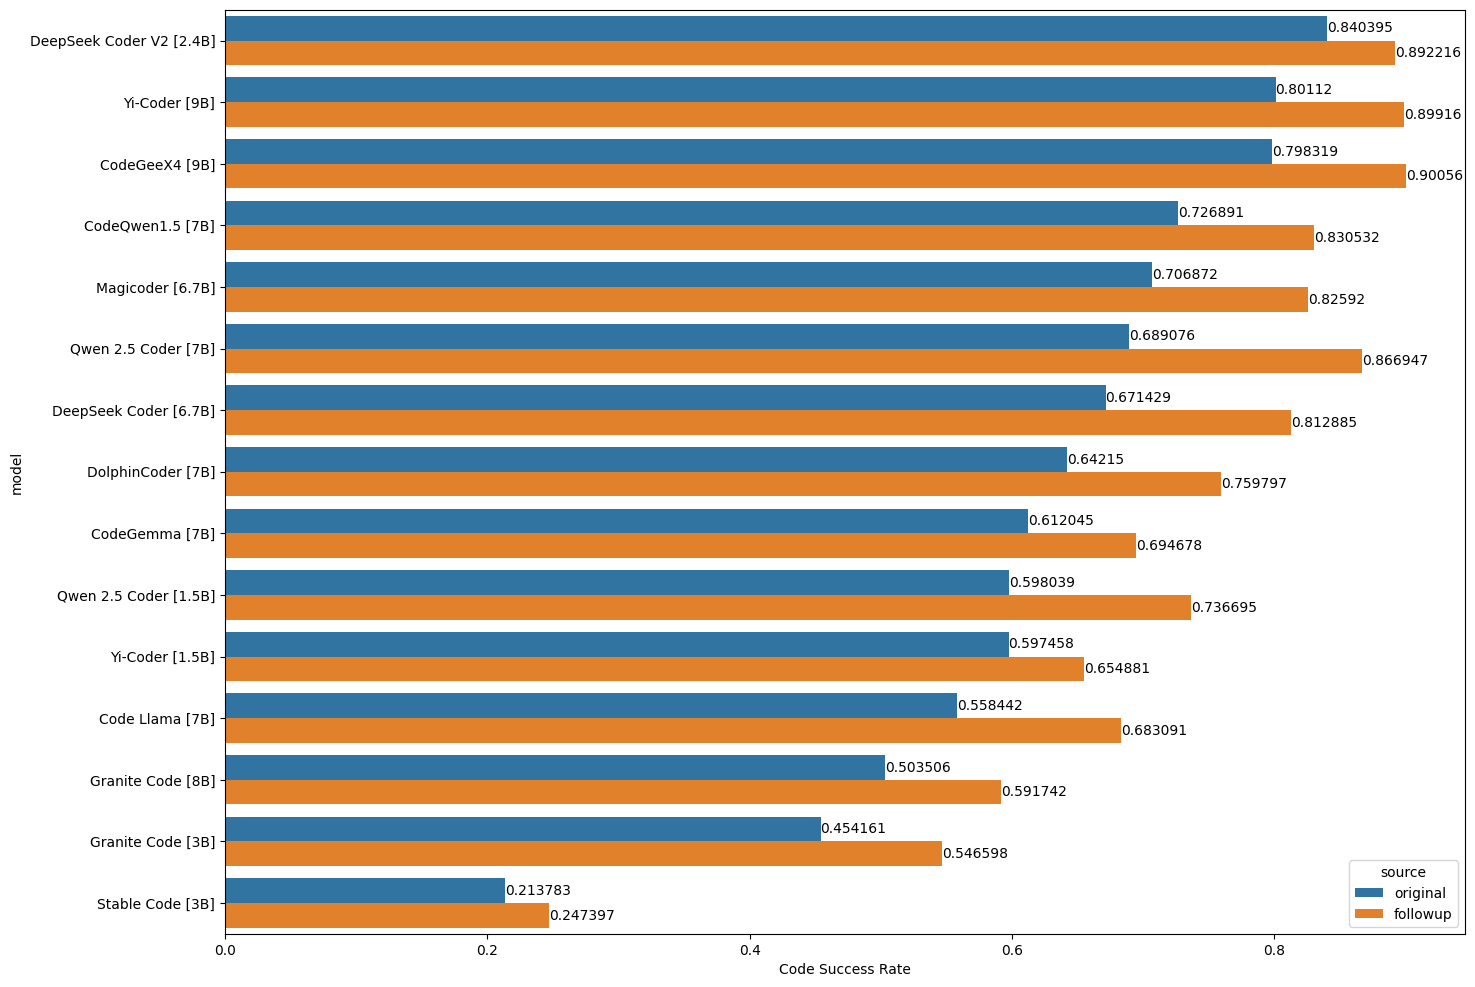

In [17]:
model_metrics["source"] = "original"
model_metrics_followup["source"] = "followup"
metrics = pd.concat([model_metrics, model_metrics_followup])
metrics["model"] = metrics["model"].apply(lambda x: MODELS[x])
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.barplot(metrics, y="model", x="valid", hue="source", legend="brief", ax=ax)
_ = ax.set_xlabel("Code Success Rate")
_ = ax.bar_label(ax.containers[0], fontsize=10)
_ = ax.bar_label(ax.containers[1], fontsize=10)

In [8]:
flang_metrics = pd.read_csv(os.path.join(RESULTS_FOLDER, "from_lang_metrics.csv"))
flang_metrics = flang_metrics[["from_lang", "valid"]]

In [9]:
flang_metrics_followup = pd.read_csv(os.path.join(RESULTS_FOLDER, "from_lang_metrics_followup.csv"))
flang_metrics_followup = flang_metrics_followup[["from_lang", "valid"]]
flang_metrics_followup.sort_values("valid", ascending=False)

,from_lang,valid
0,js,0.125490
1,py,0.118954
2,java,0.105229
4,c,0.094118
3,go,0.093464
5,cpp,0.091503
6,rs,0.084967


In [10]:
flang_metrics_followup = (
    flang_metrics.set_index("from_lang") + flang_metrics_followup.set_index("from_lang")
).reset_index()

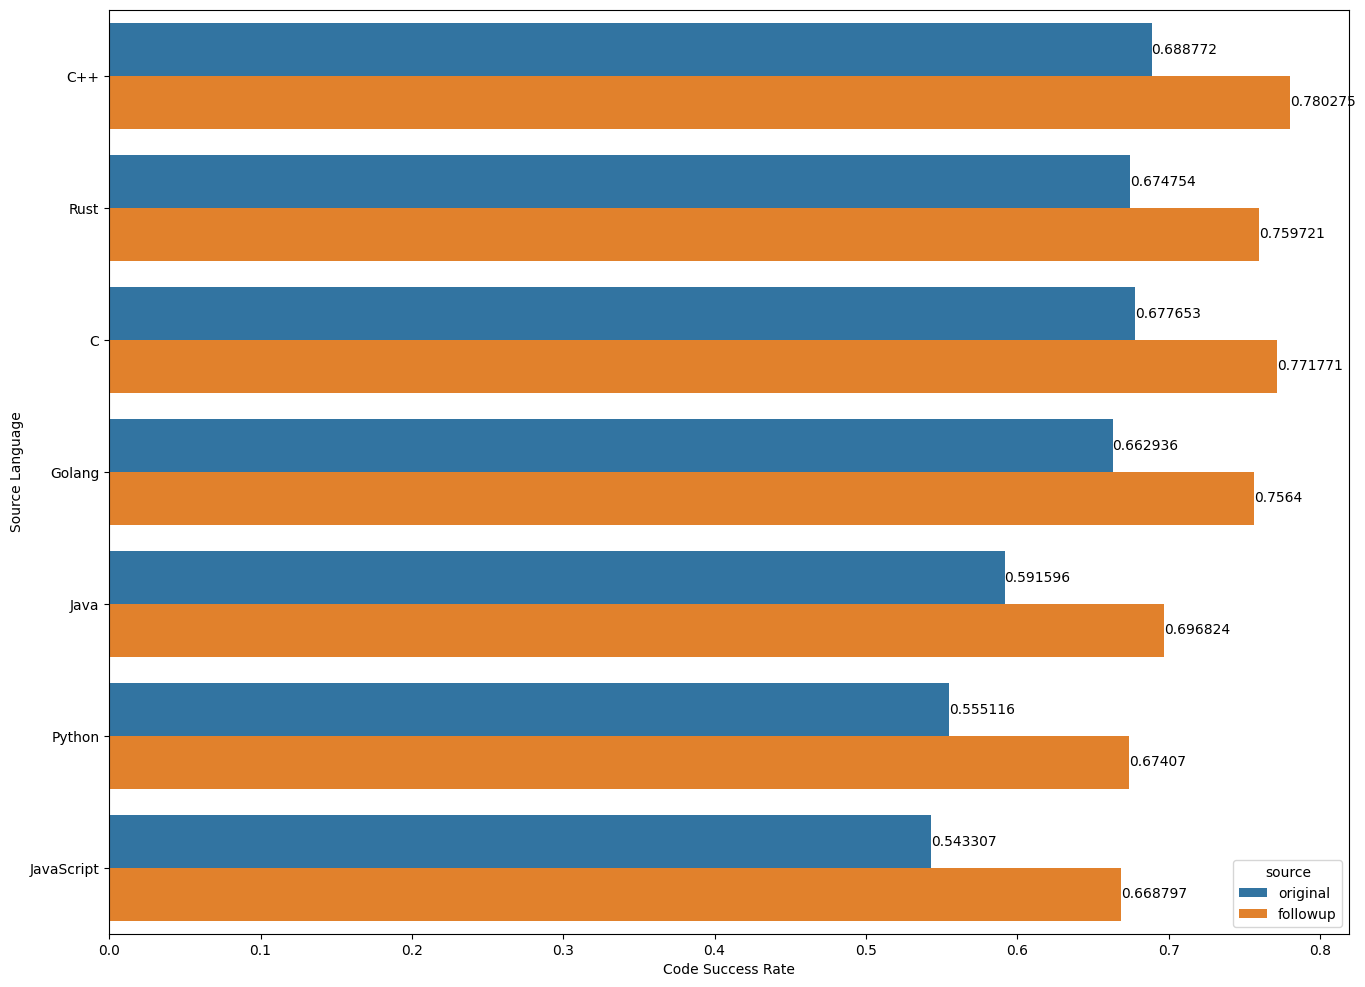

In [11]:
flang_metrics["source"] = "original"
flang_metrics_followup["source"] = "followup"
metrics = pd.concat([flang_metrics, flang_metrics_followup])
metrics["from_lang"] = metrics["from_lang"].apply(lambda x: LANGS[x.upper()])
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.barplot(metrics, y="from_lang", x="valid", hue="source", legend="brief", ax=ax)
_ = ax.set_ylabel("Source Language")
_ = ax.set_xlabel("Code Success Rate")
_ = ax.bar_label(ax.containers[0], fontsize=10)
_ = ax.bar_label(ax.containers[1], fontsize=10)

In [12]:
tlang_metrics = pd.read_csv(os.path.join(RESULTS_FOLDER, "to_lang_metrics.csv"))
tlang_metrics = tlang_metrics[["to_lang", "valid"]]

In [13]:
tlang_metrics_followup = pd.read_csv(os.path.join(RESULTS_FOLDER, "to_lang_metrics_followup.csv"))
tlang_metrics_followup = tlang_metrics_followup[["to_lang", "valid"]]
tlang_metrics_followup.sort_values("valid", ascending=False)

,to_lang,valid
0,rs,0.201961
2,go,0.158170
1,c,0.150327
3,cpp,0.090850
4,java,0.071242
5,js,0.023529
6,py,0.017647


In [14]:
tlang_metrics_followup = (
    tlang_metrics.set_index("to_lang") + tlang_metrics_followup.set_index("to_lang")
).reset_index()

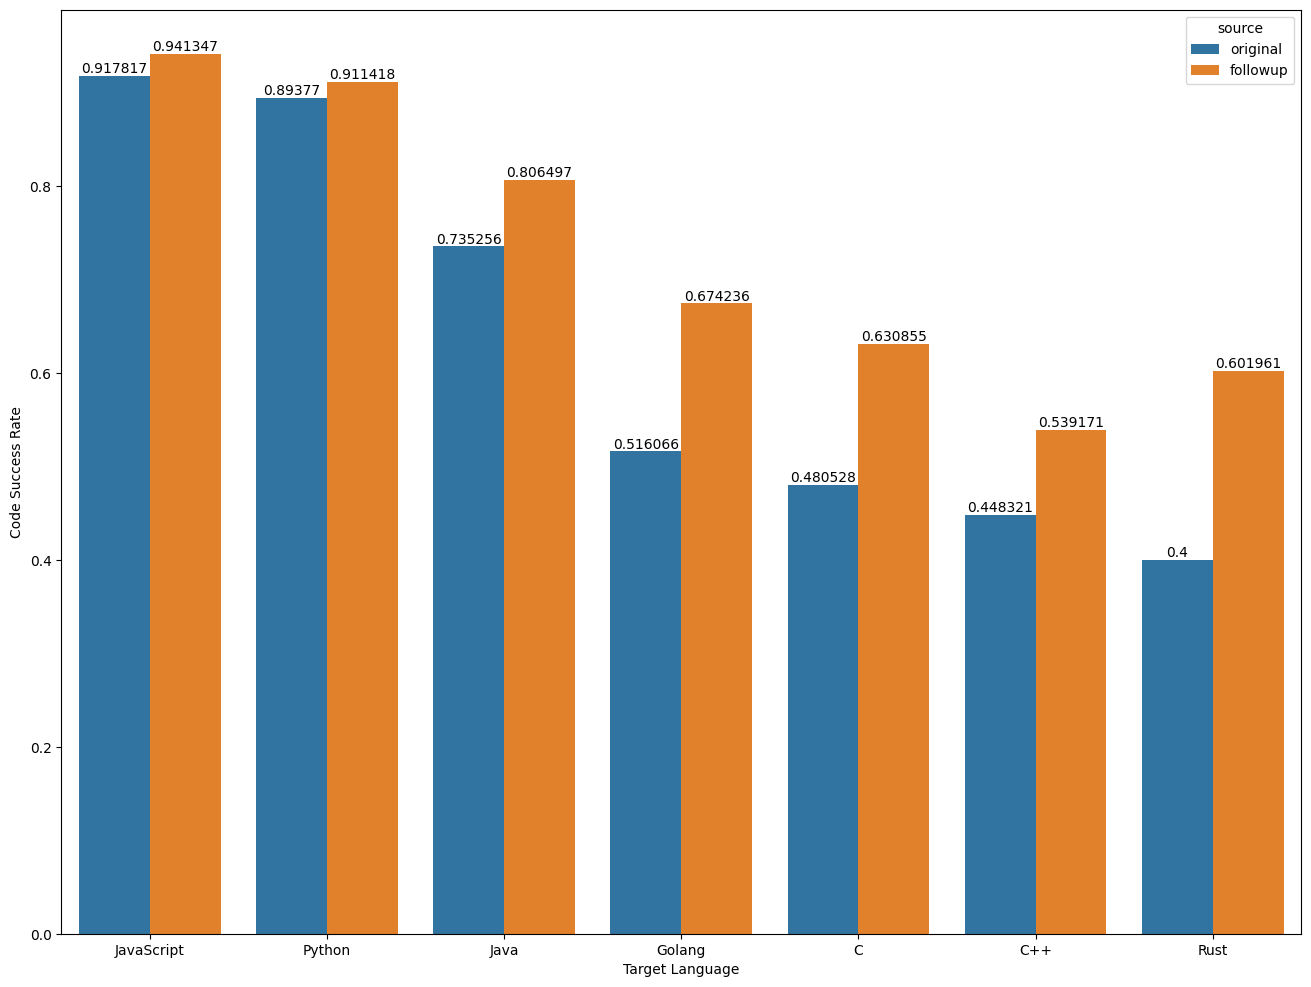

In [18]:
tlang_metrics["source"] = "original"
tlang_metrics_followup["source"] = "followup"
metrics = pd.concat([tlang_metrics, tlang_metrics_followup])
metrics["to_lang"] = metrics["to_lang"].apply(lambda x: LANGS[x.upper()])
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.barplot(metrics, x="to_lang", y="valid", hue="source", legend="brief", ax=ax)
_ = ax.set_xlabel("Target Language")
_ = ax.set_ylabel("Code Success Rate")
_ = ax.bar_label(ax.containers[0], fontsize=10)
_ = ax.bar_label(ax.containers[1], fontsize=10)